In [1]:
using Pkg
Pkg.activate("..")
using Dao
using 
    Distributions,
    Statistics,
    Random,
    Plots,
    BenchmarkTools

┌ Info: Recompiling stale cache file /Users/andresouza/.julia/compiled/v1.0/Dao/pfxnO.ji for Dao [923aee56-57d8-11e9-2f0d-e3e88a113be6]
└ @ Base loading.jl:1187


In [42]:
#define an initial probability distribution
p(x) = ( exp(-(x-2)^2/2) + exp(-(x+2)^2/2) ) / ( 2*sqrt(pi*2))

#define the loss function as the log of the probability distribution
function loss(params)
    x = params[1]
    y = log( p(x)  )
    return y
end
#define a random walk
function perturbation(params)
    new_params = deepcopy(params)
    for i in 1:length(params)
        new_params[i] += rand(Normal(0, 1))
    end
    return new_params
end

perturbation (generic function with 1 method)

In [59]:
#use the function
Random.seed!(1234)
param, error = markov_chain(loss, [0.5], perturbation, 1.0, 100000);

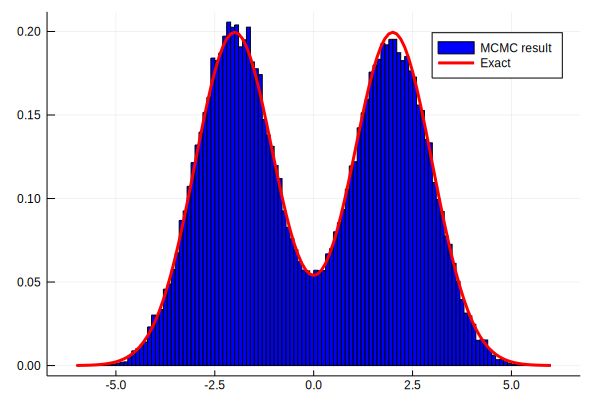

In [61]:
bins = collect(-6:0.1:6)
burnin = 100

histogram(param[1,burnin:end], bins=bins, normalize=true, color="blue", label="MCMC result")
plot!(bins, p.(bins), color="red", lw=3, label="Exact", legend=:topright)


In [7]:
@btime markov_link(loss,params,1.0,1.0,perturbation);
@btime markov_chain(loss, [0.5], perturbation, 1.0, 10000);

  206.563 ns (4 allocations: 576 bytes)
  8.490 ms (168997 allocations: 9.22 MiB)
